In [1]:

import os
import torch
import imageio
import torchvision

from torch.utils.data import Dataset

from torchvision import transforms

from sklearn.model_selection import train_test_split

from PIL import Image

import torchvision.transforms as T

import matplotlib.pyplot as plt
import numpy as np
from torcheval.metrics.functional import multiclass_f1_score as f1_score




## CNNs for CIFAR10

* https://rcalix1.github.io/DeepLearningAlgorithms/SecondEdition/chapter6_CNNs/index.html

## Load and save torch model checkpoints

* https://pytorch.org/tutorials/beginner/saving_loading_models.html

## Data

* Data: https://github.com/YoongiKim/CIFAR-10-images/tree/master


In [2]:

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


In [3]:

from sklearn.metrics import confusion_matrix
#from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score


In [4]:

## !pip install torchvision


In [5]:

torch.cuda.is_available()


True

In [6]:

torch.cuda.device_count()


1

In [7]:

torch.cuda.current_device()


0

In [8]:

torch.cuda.get_device_name(0)


'Tesla V100-PCIE-32GB'


## Assign device


In [9]:

torch_device = torch.device("cpu")

if torch.cuda.is_available(): 
    torch_device = torch.device("cuda")


In [10]:

torch_device


device(type='cuda')


## CIFAR10 DATA


In [11]:

raw_data_train = '/scratch/scholar/rcalix/CIFAR-10-images-master/train/'

raw_data_test  = '/scratch/scholar/rcalix/CIFAR-10-images-master/test/'



## PATH to checkpoint


In [12]:

PATH = "/scratch/scholar/rcalix/CNN_model_CIFAR10"



## Train data


In [13]:

dataset_train = []
labels_train  = []
targets_train = []


In [14]:

for folder in sorted( os.listdir( raw_data_train ) ):
    ## print(folder)
    for image in sorted(os.listdir( os.path.join(raw_data_train, folder) )):
        if folder not in labels_train:
            labels_train.append( folder )
        targets_train.append(  labels_train.index(folder)  )
        img_arr = imageio.imread(  os.path.join(raw_data_train, folder, image), pilmode="RGB"  )
        
        img = torch.from_numpy( img_arr ).permute( 2, 0, 1 ).float()
        
        img /= 255
        dataset_train.append(img)
        
      


/tmp/ipykernel_132106/356766511.py:7: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img_arr = imageio.imread(  os.path.join(raw_data_train, folder, image), pilmode="RGB"  )


In [15]:

len(labels_train)


10

In [16]:

len( targets_train )


50000

In [17]:

dataset_train[3].shape


torch.Size([3, 32, 32])

In [18]:

data_train    = torch.stack( dataset_train )
targets_train = torch.Tensor(  targets_train  ).type(   torch.LongTensor   )

torch.save(   (data_train, targets_train, labels_train), "InClass_CIFAR10_data"     )

## data1, targets1, labels1 = torch.load("InClass_CIFAR10_data")


In [19]:

data_train.shape


torch.Size([50000, 3, 32, 32])

In [20]:

targets_train.shape


torch.Size([50000])

In [21]:

data_train[4].shape


torch.Size([3, 32, 32])

In [22]:

targets_train[24000:25000]


tensor([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,


## Print images


In [23]:

img_tr = data_train[46000]
img_tr


tensor([[[0.8392, 0.8353, 0.7059,  ..., 0.2471, 0.2902, 0.2627],
         [0.8235, 0.8353, 0.7765,  ..., 0.1922, 0.2510, 0.2353],
         [0.8118, 0.7961, 0.7922,  ..., 0.1882, 0.2471, 0.2431],
         ...,
         [0.2078, 0.1647, 0.1255,  ..., 0.4275, 0.4275, 0.4314],
         [0.2392, 0.2471, 0.2235,  ..., 0.4235, 0.4392, 0.4588],
         [0.2314, 0.2510, 0.2275,  ..., 0.4078, 0.4275, 0.4588]],

        [[0.7529, 0.7490, 0.6196,  ..., 0.2588, 0.2980, 0.2706],
         [0.7294, 0.7490, 0.6824,  ..., 0.2078, 0.2588, 0.2510],
         [0.7059, 0.7020, 0.6863,  ..., 0.2196, 0.2627, 0.2706],
         ...,
         [0.2118, 0.1647, 0.1255,  ..., 0.4000, 0.4039, 0.4196],
         [0.2353, 0.2392, 0.2157,  ..., 0.3961, 0.4157, 0.4353],
         [0.2196, 0.2392, 0.2118,  ..., 0.3725, 0.4039, 0.4353]],

        [[0.5569, 0.5569, 0.4353,  ..., 0.1922, 0.2471, 0.2275],
         [0.5412, 0.5569, 0.5098,  ..., 0.1412, 0.2039, 0.1961],
         [0.5294, 0.5216, 0.5176,  ..., 0.1373, 0.1961, 0.

In [24]:

transform = T.ToPILImage()



In [25]:

img = transform(  img_tr  )


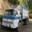

In [26]:

img



## Class balance


In [27]:

y_train_np = targets_train.numpy() 
y_train_np.shape

the_set = np.unique(  y_train_np  )
the_set


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

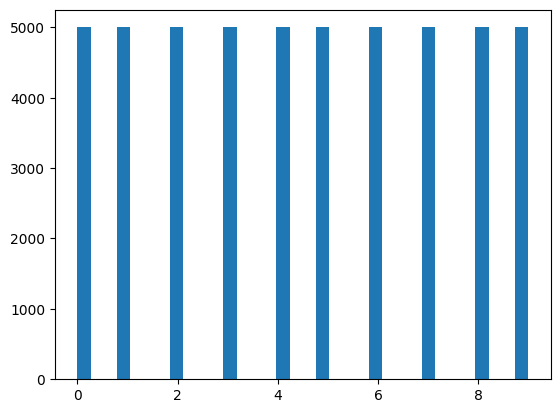

In [28]:

_ = plt.hist( targets_train.numpy() , bins="auto" )
plt.show()



## Test Data


In [29]:

dataset_test = []
labels_test = []
targets_test = []


In [30]:

for folder in sorted( os.listdir( raw_data_test ) ):
    ## print(folder)
    for image in sorted( os.listdir( os.path.join(raw_data_test, folder) ) ):
        if folder not in labels_test:
            labels_test.append( folder )
        targets_test.append(  labels_test.index(folder)  )
        img_arr = imageio.imread(  os.path.join(raw_data_test, folder, image), pilmode="RGB"  )
        
        img = torch.from_numpy( img_arr ).permute( 2, 0, 1 ).float()
        
        img /= 255
        dataset_test.append(img)


/tmp/ipykernel_132106/1136155179.py:7: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img_arr = imageio.imread(  os.path.join(raw_data_test, folder, image), pilmode="RGB"  )


In [31]:

data_test   = torch.stack( dataset_test )
targets_test = torch.Tensor(  targets_test  ).type(   torch.LongTensor   )

torch.save(   (data_test, targets_test, labels_test), "InClass_CIFAR10_data_test"     )

## data1, targets1, labels1 = torch.load("InClass_CIFAR10_data")


In [32]:

data_test.shape


torch.Size([10000, 3, 32, 32])

In [33]:

targets_test.shape


torch.Size([10000])

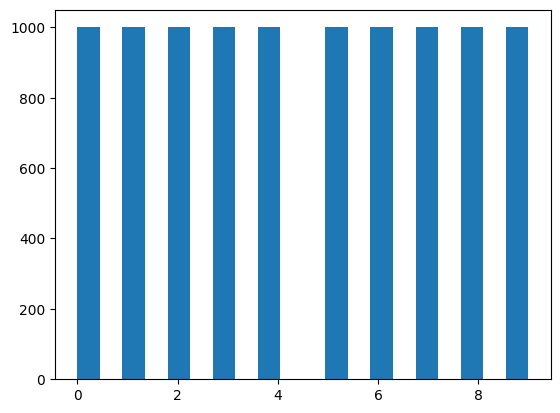

In [34]:

_ = plt.hist( targets_test.numpy() , bins="auto" )
plt.show()


In [35]:

X_train = data_train  
y_train = targets_train


In [36]:

X_test = data_test  
y_test = targets_test 



## Change to float 32


In [37]:

X_train = X_train.numpy()
X_test  = X_test.numpy()


In [38]:

X_train = X_train.astype(  np.float32  )
X_test  = X_test.astype(   np.float32  )


In [39]:

X_train = torch.from_numpy(X_train )
X_test = torch.from_numpy( X_test  )



## Normalize


In [40]:

img_norm_mean = (0.5, 0.5, 0.5)


In [41]:

img_norm_std = (0.5, 0.5, 0.5)


In [42]:

other_normalization = transforms.Compose([
                            ## transforms.ToTensor(),
                            transforms.Normalize( img_norm_mean, img_norm_std )
])


In [43]:

preprocess = transforms.Compose([
                 transforms.Resize(256),
                 transforms.CenterCrop(224),
                 transforms.ToTensor()
])


In [44]:

X_train = other_normalization( X_train )  

X_test  = other_normalization( X_test ) 



## Print shapes


In [45]:

X_train.shape[0]


50000

In [46]:

y_train[30000].item()
type(y_train[30000].item())


int

In [47]:

y_train[30000].item()


6

In [48]:

 X_train[78]


tensor([[[-0.0431, -0.0431, -0.0275,  ..., -0.0275, -0.0275, -0.0275],
         [-0.0118, -0.0118,  0.0118,  ..., -0.0431, -0.0431, -0.0431],
         [ 0.0510,  0.0510,  0.0667,  ..., -0.0353, -0.0353, -0.0353],
         ...,
         [ 0.6157,  0.6157,  0.6000,  ...,  0.0588, -0.0980, -0.2471],
         [ 0.3882,  0.3255,  0.2863,  ...,  0.1765,  0.0431, -0.2314],
         [ 0.1686,  0.1059,  0.1059,  ..., -0.1843, -0.1608, -0.0588]],

        [[ 0.6392,  0.6392,  0.6235,  ...,  0.5922,  0.5922,  0.5922],
         [ 0.6549,  0.6627,  0.6471,  ...,  0.5765,  0.5765,  0.5765],
         [ 0.6941,  0.6941,  0.6784,  ...,  0.5843,  0.5843,  0.5843],
         ...,
         [ 0.6784,  0.6941,  0.6941,  ...,  0.2078,  0.0510, -0.0902],
         [ 0.4902,  0.4275,  0.4039,  ...,  0.2706,  0.1373, -0.1294],
         [ 0.2784,  0.2157,  0.2392,  ..., -0.1059, -0.0824,  0.0196]],

        [[ 0.8745,  0.8745,  0.8588,  ...,  0.8353,  0.8353,  0.8353],
         [ 0.8824,  0.8745,  0.8745,  ...,  0

In [49]:

 CIFAR_train_list = [  ( X_train[i],  y_train[i].item() )  for i in range( X_train.shape[0]   )  ]


In [50]:

 CIFAR_test_list = [  ( X_test[i],  y_test[i].item() )  for i in range( X_test.shape[0]   )  ]



## DataLoader


In [51]:

batch_size = 64  ## 16


In [52]:

train_dl = torch.utils.data.DataLoader( CIFAR_train_list, batch_size=batch_size, shuffle=True  )


In [53]:

test_dl = torch.utils.data.DataLoader( CIFAR_test_list, batch_size=10000, shuffle=True  )



## Residual Networks


In [54]:

# 3x3 convolution
def conv3x3(in_channels, out_channels, stride=1):
    return nn.Conv2d(in_channels, out_channels, kernel_size=3, 
                     stride=stride, padding=1, bias=False)


In [55]:

# Residual block
class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1, downsample=None):
        super(ResidualBlock, self).__init__()
        self.conv1 = conv3x3(in_channels, out_channels, stride)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = conv3x3(out_channels, out_channels)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.downsample = downsample

    def forward(self, x):
        residual = x
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.conv2(out)
        out = self.bn2(out)
        if self.downsample:
            residual = self.downsample(x)
        out += residual
        out = self.relu(out)
        return out


In [56]:



# ResNet
class MyResNet(nn.Module):
    def __init__(self, block, layers, num_classes=10):
        super(MyResNet, self).__init__()
        self.in_channels = 16
        self.conv = conv3x3(3, 16)
        self.bn = nn.BatchNorm2d(16)
        self.relu = nn.ReLU(inplace=True)
        self.layer1 = self.make_layer(block, 16, layers[0])
        self.layer2 = self.make_layer(block, 32, layers[1], 2)
        self.layer3 = self.make_layer(block, 64, layers[2], 2)
        self.avg_pool = nn.AvgPool2d(8)
        self.fc = nn.Linear(64, num_classes)

    def make_layer(self, block, out_channels, blocks, stride=1):
        downsample = None
        if (stride != 1) or (self.in_channels != out_channels):
            downsample = nn.Sequential(
                conv3x3(self.in_channels, out_channels, stride=stride),
                nn.BatchNorm2d(out_channels))
        layers = []
        layers.append(block(self.in_channels, out_channels, stride, downsample))
        self.in_channels = out_channels
        for i in range(1, blocks):
            layers.append(block(out_channels, out_channels))
        return nn.Sequential(*layers)

    def forward(self, x):
        out = self.conv(x)
        out = self.bn(out)
        out = self.relu(out)
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.avg_pool(out)
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out






## Architectures


In [57]:

32*32*3


3072

In [58]:

class DL_3h_net(nn.Module):
    ## init the class
    def __init__(self):
        super().__init__()
        
        self.linear1 = nn.Linear( 32*32*3 , 200)
        self.act1    = nn.ReLU()
        
        self.linear2 = nn.Linear(200 , 100)
        self.act2   = nn.ReLU()
        
        self.linear3 = nn.Linear( 100 ,50)
        self.act3    = nn.ReLU()
        
        self.linear4 = nn.Linear(50 , 10)
        self.act4    = nn.Softmax(dim=1)
        
        ## self.norm    = nn.LayerNorm()
        
    ## perform inference
    def forward(self, x):
        
        x            = self.linear1(x)
        x            = self.act1(x)
        x            = self.linear2(x)
        x            = self.act2(x)
        x            = self.linear3(x)
        x            = self.act3(x)
      
        x            = self.linear4(x)
        y_pred       = self.act4(x)
        
        return y_pred


In [59]:

class CNN_net(nn.Module):
    ## init the class
    def __init__(self):
        super().__init__()
        
        self.model = nn.Sequential(
            
            ## conv layer 1
            nn.Conv2d(3, 16, kernel_size=5, stride=1, padding=1  ),
            nn.LeakyReLU(),
            nn.BatchNorm2d(16),
            nn.MaxPool2d(2, 2), 
            nn.Dropout(0.2),
            
            ## conv layer 2
            nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=1  ),
            nn.LeakyReLU(),
            nn.BatchNorm2d(32),
            nn.MaxPool2d(2, 2), 
            nn.Dropout(0.2),
            
            ## conv layer 2
            nn.Conv2d(32, 32, kernel_size=5, stride=1, padding=1  ),
            nn.LeakyReLU(),
            nn.BatchNorm2d(32),
            nn.MaxPool2d(2, 2), 
            nn.Dropout(0.2),
              
            ## FeedForward
            
            nn.Flatten(),
            nn.Linear( 128 , 512),
            nn.LeakyReLU(),
            nn.Dropout(0.2),
            
            nn.Linear(512, 10),
            nn.Softmax(dim=1)        ## nn.LogSoftmax()
            
        
        )
        
    ## perform inference
    def forward(self, x):
        
        y_pred = self.model( x  )
       
        
        return y_pred



In [60]:

class View(nn.Module):
    def __init__(self, shape):
        super().__init__()
        # self.shape = shape,
        self.shape = shape
        
    def forward(self, x):
        return x.view(*self.shape)


In [61]:

  
class CNN_net_DH(nn.Module):
    ## init the class
    def __init__(self):
        super().__init__()
        
        self.model = nn.Sequential(
            nn.Conv2d(3, 32, 3),
            ## nn.Conv2d(32, 32, 3),
            nn.LeakyReLU(),
            nn.MaxPool2d(2, 2),
            nn.Dropout(0.25),
            
            nn.Conv2d(32, 64, 3),
            nn.LeakyReLU(),
            nn.MaxPool2d(2, 2),
            nn.Dropout(0.25),
            
            nn.Conv2d(64, 128, 3, padding=2),
            nn.LeakyReLU(),
            nn.MaxPool2d(2, 2),
            nn.Dropout(0.25),
            
            nn.Conv2d(128, 256, 3),
            nn.LeakyReLU(),
            nn.MaxPool2d(2, 2),
            nn.Dropout(0.25),
            
            View((-1, 256)),
            
            nn.Linear(256, 128),
            nn.LeakyReLU(),
            nn.Dropout(0.25),
            
            nn.Linear(128, 64),
            nn.LeakyReLU(),
            nn.Dropout(0.25),
            
            nn.Linear(64, 10) # Output 10 classes
            ## nn.Softmax(dim=1)        ## nn.LogSoftmax()
        )
        
            
     
    ## perform inference
    def forward(self, x):
        
        y_pred = self.model( x  )
       
        
        return y_pred

        


In [62]:

class MLP_net(nn.Module):
    ## init the class
    def __init__(self):
        super().__init__()
        
        self.linear1 = nn.Linear( 32*32*3 ,20)
        self.act1    = nn.LeakyReLU()
        self.linear2 = nn.Linear(20 , 10)
        self.act2    = nn.Softmax(dim=1)
        
        self.norm    = nn.LayerNorm()
        self.dropout = nn.Dropout(0.2)
        
        
    ## perform inference
    def forward(self, x):
        
        x            = self.linear1(x)
        x            = self.act1(x)
        x            = self.norm(x)
        x            = self.dropout(x)
        
        x            = self.linear2(x)
        y_pred       = self.act2(x)
        
        return y_pred


In [63]:

def training_loop( N_Epochs, model, loss_fn, opt ):
    for epoch in range(N_Epochs):
        for xb, yb in train_dl:
            
            ## xb = xb.view(  (16, -1 ) )
            
            xb = xb.to( torch_device )
            yb = yb.to( torch_device )
            
            y_pred = model(xb)
            
            loss = loss_fn(y_pred, yb)
            
            opt.zero_grad()
            loss.backward()
            opt.step()
        
        if epoch % 5 == 0:
            print(epoch, "loss=", loss)
            new_PATH = PATH + str(epoch)
            print( new_PATH )
            torch.save(model, new_PATH)


In [64]:

## torch.save(model, PATH)





## Core functions


In [66]:

N_Epochs      = 100
learning_rate = 0.001


In [67]:

## model = MLP_net()
## model =  DL_3h_net()

## model = CNN_net()

model = CNN_net_DH()
model.to( torch_device )

## model = MyResNet(ResidualBlock, [2, 2, 2]).to( torch_device )


opt = torch.optim.Adam(  model.parameters(), lr=learning_rate, weight_decay=0.001 )

loss_fn = nn.CrossEntropyLoss()


In [68]:

training_loop( N_Epochs, model, loss_fn, opt )


0 loss= tensor(1.6114, device='cuda:0', grad_fn=<NllLossBackward0>)
/scratch/scholar/rcalix/CNN_model_CIFAR100
5 loss= tensor(0.6898, device='cuda:0', grad_fn=<NllLossBackward0>)
/scratch/scholar/rcalix/CNN_model_CIFAR105
10 loss= tensor(0.9841, device='cuda:0', grad_fn=<NllLossBackward0>)
/scratch/scholar/rcalix/CNN_model_CIFAR1010
15 loss= tensor(0.3971, device='cuda:0', grad_fn=<NllLossBackward0>)
/scratch/scholar/rcalix/CNN_model_CIFAR1015
20 loss= tensor(0.9319, device='cuda:0', grad_fn=<NllLossBackward0>)
/scratch/scholar/rcalix/CNN_model_CIFAR1020
25 loss= tensor(0.5255, device='cuda:0', grad_fn=<NllLossBackward0>)
/scratch/scholar/rcalix/CNN_model_CIFAR1025
30 loss= tensor(1.1482, device='cuda:0', grad_fn=<NllLossBackward0>)
/scratch/scholar/rcalix/CNN_model_CIFAR1030
35 loss= tensor(0.9816, device='cuda:0', grad_fn=<NllLossBackward0>)
/scratch/scholar/rcalix/CNN_model_CIFAR1035
40 loss= tensor(1.0182, device='cuda:0', grad_fn=<NllLossBackward0>)
/scratch/scholar/rcalix/CNN_mod

In [69]:

def print_metrics_function(y_test, y_pred):
    print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
    confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
    print("Confusion Matrix:")
    print(confmat)
    print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred, average='weighted'))
    print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred, average='weighted'))
    print('F1-measure: %.3f' % f1_score(y_true=y_test, y_pred=y_pred, average='weighted'))

def testing_loop(test_dl, model, device):
    my_f1 = 0.0
    count = 0.0
    with torch.no_grad():
        for x_raw, y_raw in test_dl:
            x_true, y_true = x_raw.to(device), y_raw.to(device)
            _, y_pred = torch.max(model(x_true), dim=1)
            my_f1 += f1_score(y_true, y_pred, num_classes=10)
            count += 1
    return my_f1 / count


In [ ]:
with torch.no_grad():
    for x_real, y_real in test_dl:
        
        batch_size = x_real.shape[0]
        
        ## x_real = x_real.view(  (batch_size, -1 ) )
        
        x_real = x_real.to( torch_device )
        
        y_pred = model(  x_real  )
        
        vals, indeces = torch.max( y_pred, dim=1  )
        preds = indeces
        print_metrics_function( y_real, preds.cpu() )

In [70]:
print(testing_loop(test_dl, model, torch_device))

tensor(0.7079, device='cuda:0')



## From checkpoint


In [ ]:

# Model class must be defined somewhere
model2 = torch.load('/scratch/scholar/rcalix/CNN_model_CIFAR1095')
## model.eval()



In [ ]:

with torch.no_grad():
    for x_real, y_real in test_dl:
        
        batch_size = x_real.shape[0]
        
        ## x_real = x_real.view(  (batch_size, -1 ) )
        
        x_real = x_real.to( torch_device )
        
        y_pred = model2(  x_real  )
        
        vals, indeces = torch.max( y_pred, dim=1  )
        preds = indeces
        print_metrics_function(y_real, preds.cpu() )


In [ ]:

rc = data_train[4].view((-1))
rc.shape


In [ ]:

rc = torch.unsqueeze(rc, dim=0)
rc.shape


In [ ]:

## example_label = model( rc )


In [ ]:

## example_label



## Figure out the dimensions of CNN


In [ ]:

N_batches_rc = 16


In [ ]:
'''

model_rc = nn.Sequential(
            
            ## conv layer 1
            nn.Conv2d(3, 16, kernel_size=5, stride=1, padding=1  ),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), 
            
            ## conv layer 2
            nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=1  ),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), 
              
            ## FeedForward
            
            nn.Flatten()
            
            
        
        )
        
'''


model_rc  = nn.Sequential(
            
            ## conv layer 1
            nn.Conv2d(3, 16, kernel_size=5, stride=1, padding=1  ),
            nn.LeakyReLU(),
            nn.BatchNorm2d(16),
            nn.MaxPool2d(2, 2), 
            nn.Dropout(0.2),
            
            ## conv layer 2
            nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=1  ),
            nn.LeakyReLU(),
            nn.BatchNorm2d(32),
            nn.MaxPool2d(2, 2), 
            nn.Dropout(0.2),
            
            ## conv layer 3
            nn.Conv2d(32, 32, kernel_size=5, stride=1, padding=1  ),
            nn.LeakyReLU(),
            nn.BatchNorm2d(32),
            nn.MaxPool2d(2, 2), 
            nn.Dropout(0.2),
              
            ## FeedForward
            
            nn.Flatten()
)


In [ ]:

my_tensor_test   = torch.randn(N_batches_rc, 3, 32,  32)

res_actual_model = model_rc(  my_tensor_test   )

res_actual_model.shape
